# 문제1.

## CNN 개념

### (1) 아래 Convolution(합성곱)의 정의를 보고 합성곱의 의미를 적어주세요.

## $(f*g)(t) = \int_{-\infty}^{\infty} f(\tau)g(t-\tau)\, d\tau$



답) 하나의 함수와 다른 함수를 곱하고 적분하여 새로운 함수를 구한다.

### (2) CNN은 인간의 시신경 구조를 모방한 모델입니다. 아래 개념에 대해 설명해주세요.

 1. 수용장(receptive field): 각 층의 뉴런이 입력 데이터에 얼마나 영향을 받는지 나타내는 부분
 2. 스트라이드(stride): 커널에 입력 데이터를 얼마나 넘어가면서 이동할지 결정하는 값
 3. 풀링(pooling): 공간 차원을 줄이는 역할 
 4. 특징(Feather Map): 입력 데이터에 대해 필터를 적용해 얻은 출력 데이터
 5. Activation Map: 활성화 함수를 거쳐 나온 특징 맵
 6. 채널(Chanel): 입력 및 출력 데이터의 차원 중 하나
 7. 필터(Filter),커널(Kernel): 입력 데이터에 적용되는 작은 가중치 행렬
 8. 패딩(padding): 입력 데이터 주변에 추가적인 값을 채워넣는 것
 

### (3) CNN에서 특성을 계산할때 원소곱을 하는 이유에 대해 설명해주세요.

답) 특징 맵의 특정 위치에서 입력과 커널 사이의 상호작용을 나타내기 위해서이다.

### (4) 이미지 처리에서 CNN이 fully connected neural network 보다 더 효율적인 이유를 말해주세요.

답) 파라미터 공유, 폴링 연산 등 이미지의 특정 패턴이나 구조를 효과적으로 CNN이 학습하기 때문이다. 

### (5) 다음 각각의 경우에 대하여 출력 맵의 크기를 계산하시오. (단, w = 입력 크기, f = 필터 크기,  s = stride, p = padding)

(1) w = 7 x 1, f = 3 x 1 ,s = 1, p = 0  (정답: 5 x 1)

(2) w = 5 x 1, f = 3 x 1, s = 1, p = 1  (정답: 5 x 1)

(3) w = 4 x 4, f = 2 x 2, s = 1, p = 0  (정답: 3 x 3)

(4) w = 5 x 5, f = 3 x 3, s = 2, p = 0  (정답: 2 x 2)

(5) w = 7 x 7, f = 3 x 3, s = 2, p = 2  (정답: 5 x 5)

1) 5X1

2) 5X1

3) 3X3

4) 2X2

5) 5X5

### (6) 다음과 같이 입력과 커널이 주어졌을 때, 빈칸을 채우시오.

(6) -1

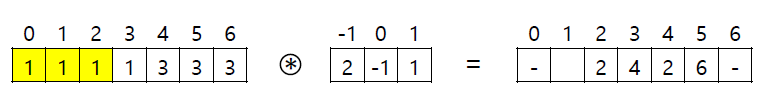

답)

(6) -2

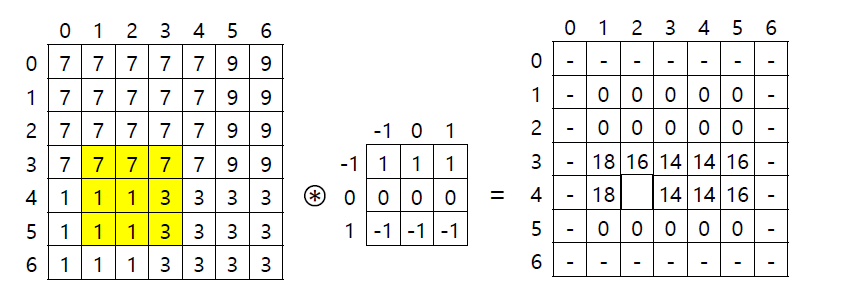

답)

(6) -3
 

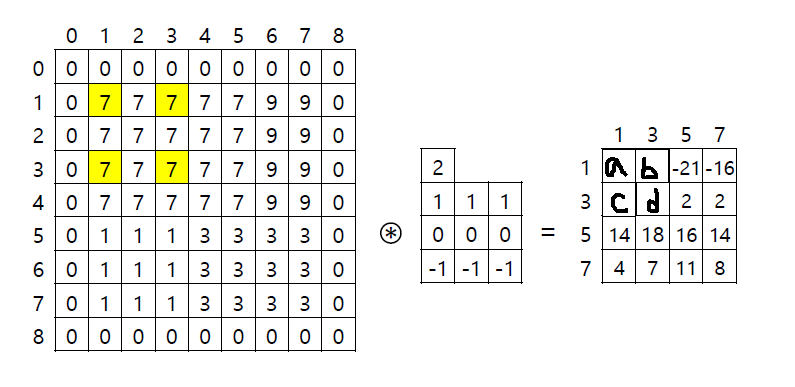

답)

### (7) 다음 빈칸에 들어갈 알맞은 말은?

Padding은 반복적으로 합성곱 연산을 수행했을 때, _______________________ 을 방지함과, ________________________ 을 줄이고자 이미지 주변에 0으로 채워 넣는 방식이다.

답) 출력 맵의 크기 축소, 입력 이미지의 정보 손실

# 문제2.

## (1) Conv2d Layer 구현하기

- `torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0)`
- Reference : https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

문제 : 위 reference를 참조하여 각 파라미터가 무엇을 의미하는지 작성하세요.

- `in_channels ` : 입력 채널 수
- `out_channels` : 출력 채널 수
- `kernel_size` : 커널 크기
- `stride` : 스트라이드 
- `padding` : 패딩

In [3]:
####################### 실행 #######################
import torch
import torch.nn as nn
import torch.nn.functional as F
###################################################

####################### 문제 #######################

# 임의의 텐서를 만듭시다. 텐서의 크기는 20 * 1 * 28 * 28 입니다.
input = torch.randn((20,1,28,28))

# 첫번째 conv layer 구성 : in_channel=1, out_channel=3, kernel_size=3, stride=1
conv1 = nn.Conv2d(1,3,3,1)
print(conv1) #구성한 conv layer 확인
output = conv1(input)

# 첫번째 conv layer을 통과한 tensor의 shape을 미리 계산해보고 확인해봅시다.
print(output.shape)

# 두번째 conv layer 구성 : in_channel=3, out_channel=9, kernel_size=5, stride=1
conv2 = nn.Conv2d(3,9,5,1)
print(conv2) #구성한 conv layer 확인
output_2 = conv2(output)

# 두번째 conv layer을 통과한 tensor의 shape을 미리 계산해보고 확인해봅시다.
print(output_2.shape)

###################################################


Conv2d(1, 3, kernel_size=(3, 3), stride=(1, 1))
torch.Size([20, 3, 26, 26])
Conv2d(3, 9, kernel_size=(5, 5), stride=(1, 1))
torch.Size([20, 9, 22, 22])


이제 클래스를 통해서 CNN 클래스를 정의해봅니다.

토치의 nn.Module을 상속받아 CNN 클래스를 정의합니다.

In [10]:
####################### 문제 #######################

# 각 layer의 구성은 위의 예제와 동일하게 진행합니다.

class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()
    self.conv1 = nn.Conv2d(1,3,3,1) # 빈칸 채우기
    self.conv2 = nn.Conv2d(3,9,5,1) # 빈칸 채우기
    self.fc = nn.Linear(144, 10) # 빈칸 채우기

  def forward(self,x):
    print("연산 전", x.size())
    out = self.conv1(x)
    out = F.relu(out)
    print("conv1 연산 후", out.size())
    out = self.conv2(out)
    out = F.relu(out)
    print("conv2 연산 후",out.size())
    out = out.view(out.size(0),-1)
    print("차원 감소 후", out.size())
    out = self.fc(out)
    print("fc2 연산 후", out.size())
    return out

###################################################

In [11]:
####################### 실행 #######################
cnn = CNN()
output = cnn(input)
print('최종 output 텐서의 shape는: {}'.format(output.shape))
###################################################

연산 전 torch.Size([20, 1, 28, 28])
conv1 연산 후 torch.Size([20, 3, 26, 26])
conv2 연산 후 torch.Size([20, 9, 22, 22])
차원 감소 후 torch.Size([20, 4356])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (20x4356 and 144x10)

## (2) Pooling Layer 추가하기

### 2.1 
풀링층은 합성곱층과 유사하게 특성 맵의 차원을 다운 샘플링하여 연산량을 감소시키고, 주요 특성 벡터를 추출하여 학습을 효과적으로 할 수 있게 합니다. 풀링 연산에는 2가지가 사용되는데, 그 종류를 각각 설명해주세요.

답)<br/>
1)max pooling : 각 풀링 영역에서 최대값을 추출하는 연산<br/> 
2)average pooling : 각 풀링 영역에서 평균값을 계산하는 연산

두가지 풀링 연산 중, 대부분의 합성곱 신경망에서 사용되는 풀링 연산으로 다음 값을 채워 넣어주세요.(stride는 2입니다.)

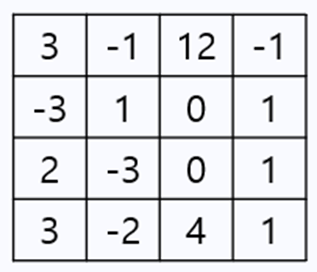

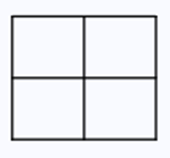

답) 3 12
    2 4

위의 CNN 클래스를 정의한 코드에 pooling layer를 추가하여 정의해보고자 합니다. ????을 채워주세요. (stride는 2입니다)

In [12]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 3, 3, 1)
        self.pool1 = nn.MaxPool2d(2,2)  # 첫 번째 MaxPooling 추가
        self.conv2 = nn.Conv2d(3, 9, 5, 1)
        self.pool2 = nn.MaxPool2d(2,2) # 두 번째 MaxPooling 추가
        self.fc = nn.Linear(144, 10)

    def forward(self, x):
        print("연산 전", x.size())
        out = self.conv1(x)
        out = F.relu(out)
        out = self.pool1(out)  # 첫 번째 MaxPooling 적용
        print("conv1 연산 후", out.size())
        out = self.conv2(out)
        out = F.relu(out)
        out = self.pool2(out)  # 두 번째 MaxPooling 적용
        print("conv2 연산 후", out.size())
        out = out.view(out.size(0), -1)
        print("차원 감소 후", out.size())
        out = self.fc(out)
        print("fc2 연산 후", out.size())
        return out

In [13]:
####################### 실행 #######################
cnn = CNN()
output = cnn(input)
print('최종 output 텐서의 shape는: {}'.format(output.shape))
###################################################

연산 전 torch.Size([20, 1, 28, 28])
conv1 연산 후 torch.Size([20, 3, 13, 13])
conv2 연산 후 torch.Size([20, 9, 4, 4])
차원 감소 후 torch.Size([20, 144])
fc2 연산 후 torch.Size([20, 10])
최종 output 텐서의 shape는: torch.Size([20, 10])


# 문제3 (100점)

## 다음은 AlexNet과 ResNet의 아키텍처입니다. 모델의 구조를 보고, AlexNet과 ResNet의 차이를 서술하세요.

## AlexNet

In [14]:
import torch
import torch.nn as nn

class AlexNet(nn.Module):
    def __init__(self, num_classes=1000):
        super(AlexNet, self).__init__()
        # 합성곱 계층 정의
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2), # 첫 번째 합성곱 계층
            nn.ReLU(inplace=True), # 활성화 함수
            nn.MaxPool2d(kernel_size=3, stride=2), # 최대 풀링
            nn.Conv2d(64, 192, kernel_size=5, padding=2), # 두 번째 합성곱 계층
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1), # 세 번째 합성곱 계층
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1), # 네 번째 합성곱 계층
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1), # 다섯 번째 합성곱 계층
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6)) # 적응형 평균 풀링
        # 완전 연결 계층 정의
        self.classifier = nn.Sequential(
            nn.Dropout(), # 드롭아웃을 사용하여 과적합 방지
            nn.Linear(256 * 6 * 6, 4096), # 첫 번째 완전 연결 계층
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096), # 두 번째 완전 연결 계층
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes), # 출력 계층
        )

    def forward(self, x):
        # 입력 데이터를 합성곱 계층을 통해 전달
        x = self.features(x)
        x = self.avgpool(x)
        # 데이터를 1차원으로 변환
        x = torch.flatten(x, 1)
        # 완전 연결 계층을 통해 전달
        x = self.classifier(x)
        return x

In [15]:
cnn = CNN()
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn.parameters(), lr=0.01)

NameError: name 'optim' is not defined

## ResNet

In [16]:
import torch
import torch.nn as nn

def conv3x3(in_planes, out_planes, stride=1):
    # 3x3 합성곱 정의, 바이어스는 사용하지 않음
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride, padding=1, bias=False)

class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        # 첫 번째 합성곱
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU(inplace=True)
        # 두 번째 합성곱
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = nn.BatchNorm2d(planes)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        # 잔차 연결
        if self.downsample is not None:
            residual = self.downsample(x)

        out += residual
        out = self.relu(out)

        return out

class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=1000):
        self.inplanes = 64

## 차이점

In [ ]:
# 구조적 차이와, 그 차이가 어떻게 성능 개선을 이끌어낼지에 대해 생각하고 자유롭게 서술해주세요.
alexnet은 합성곱 계층과 완전 연결 계층이 번갈아 나오는 구조로 비교적 얕은 신경망 구조이고,
resnet은 깊은 네트워크 구조로 되어있다.
resnet의 깊은 네트워크 구조는 더 효과적으로 훈련시킬 수 있기에 이미지 분야에서 더욱 좋은 성능을 가진다.
